In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
df  = pd.read_csv('../datasets/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x =df[['Annual Income (k$)','Spending Score (1-100)']]

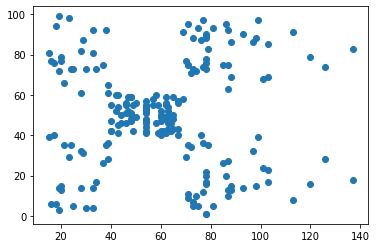

In [5]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [6]:
from sklearn.cluster import KMeans

In [7]:
model = KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

In [8]:
model.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

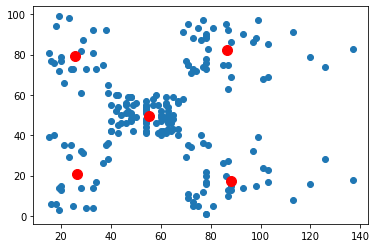

In [10]:
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red',s=100)

In [11]:
yp = model.predict(x)

In [12]:
c0 = x[yp==0]
c1 = x[yp==1]
c2 = x[yp==2]
c3 = x[yp==3]
c4 = x[yp==4]

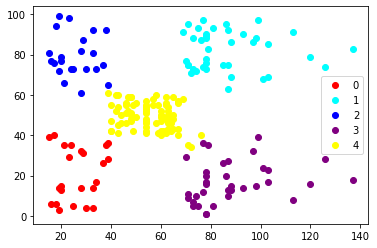

In [13]:
plt.scatter(c0['Annual Income (k$)'], c0['Spending Score (1-100)'],c='red', label='0')
plt.scatter(c1['Annual Income (k$)'], c1['Spending Score (1-100)'],c='cyan', label='1')
plt.scatter(c2['Annual Income (k$)'], c2['Spending Score (1-100)'],c='blue', label='2')
plt.scatter(c3['Annual Income (k$)'], c3['Spending Score (1-100)'],c='purple', label='3')
plt.scatter(c4['Annual Income (k$)'], c4['Spending Score (1-100)'],c='yellow', label='4')
plt.legend()

In [22]:
model.predict([[100,80]])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([6])

In [23]:
model.inertia_

19634.554629349976

In [17]:
WCSS = []
for nc in range(1,11):
    model = KMeans(n_clusters=nc)
    model.fit(x)
    WCSS.append(model.inertia_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
WCSS

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30241.34361793658,
 24986.52564064288,
 21862.092672182895,
 19634.554629349976]

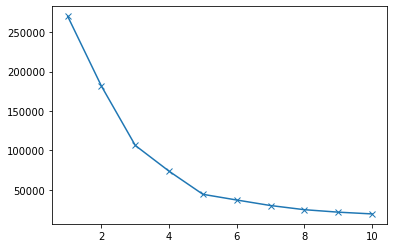

In [19]:
plt.plot(range(1,11), WCSS, marker='x')

In [20]:
final_model = KMeans(n_clusters=5)
